In [62]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import time
from PIL import Image
import cv2

### 1.1

### Steps Followed

1. **Define the DFT Function**
   - Implement a function `dft1` that computes the Discrete Fourier Transform (DFT) of a given signal.

2. **Load the Audio File**
   - Load an audio file from the specified path using `librosa` without resampling.

3. **Apply DFT on the Audio**
   - Use the `dft1` function to compute the DFT of the loaded audio signal.

4. **Calculate Frequencies and Magnitudes**
   - Determine the frequency bins and magnitudes of the DFT result for plotting.

5. **Plot Frequency vs Magnitude**
   - Plot the magnitude spectrum (magnitude vs. frequency) for positive frequencies.


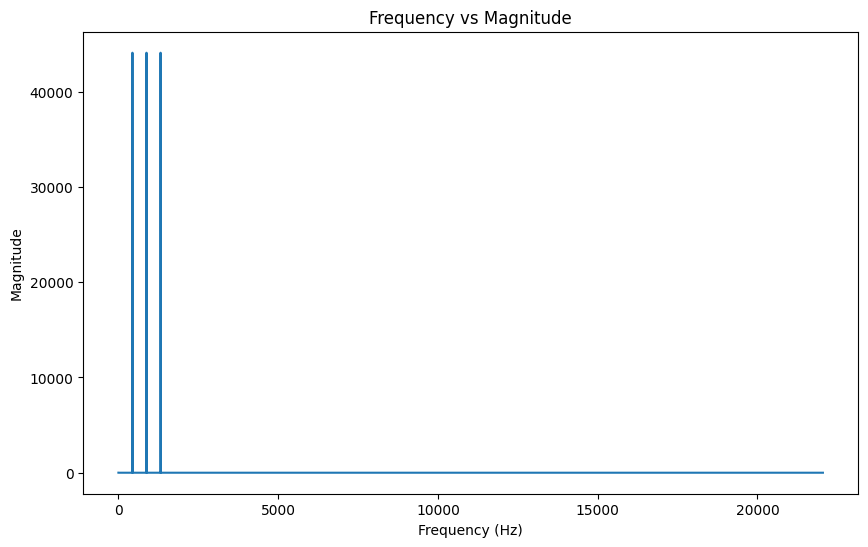

In [33]:

def dft1(signal):
    N = len(signal)
    dft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            angle = -2j * np.pi * k * n / N
            dft_result[k] += signal[n] * np.exp(angle)
    return dft_result

file_path = '../data/1.wav'
audio, sr = librosa.load(file_path, sr=None)

dft_output = dft1(audio)
 
N = len(dft_output)
frequencies = np.array([(k * sr) / N for k in range(N)]) 
magnitudes = np.abs(dft_output)

# Step 5: Plot frequency vs magnitude
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N // 2], magnitudes[:N // 2]) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency vs Magnitude')
plt.show()


### 1.2

### Steps Followed

1. **Apply DFT along Each Row**
   - Use the `dft1` function to compute the DFT along each row of the input matrix.

2. **Apply DFT along Each Column of the Row-Transformed Matrix**
   - Apply the `dft1` function along each column of the previously row-transformed matrix to get the final result.


In [34]:
def dft2(matrix):
    row_transformed = np.array([dft1(row) for row in matrix])
    col_transformed = np.array([dft1(row_transformed[:, col]) for col in range(row_transformed.shape[1])]).T
    return col_transformed

### 1.3

### Steps Followed

1. **Pad Signal to the Next Power of 2 if Necessary**
   - Check if the length of the signal is a power of 2. If not, pad it to the next power of 2 to optimize the FFT computation.

2. **Base Case for Recursion**
   - If the length of the signal is 1, return the signal array as the base case for the recursive FFT calculation.

3. **Recursive FFT Calculation**
   - Recursively compute the FFT for the even-indexed and odd-indexed parts of the signal.

4. **Combine Results with Twiddle Factors**
   - Combine the even and odd parts using twiddle factors to get the final FFT result.


In [35]:
def fft1(signal):
    N = len(signal)
    if N & (N - 1) != 0:
        next_power_of_2 = 2**int(np.ceil(np.log2(N)))
        signal = np.pad(signal, (0, next_power_of_2 - N), mode='constant')
        N = next_power_of_2
        
    if N == 1:
        return np.array(signal)

    even_part = fft1(signal[::2])
    odd_part = fft1(signal[1::2])

    T = np.exp(-2j * np.pi * np.arange(N // 2) / N) * odd_part
    return np.concatenate([even_part + T, even_part - T])

### 1.4

### Steps Followed

1. **Determine Matrix Dimensions and Pad if Necessary**
   - Check the dimensions of the matrix and pad the rows and columns to the next power of 2 to optimize the FFT computation.

2. **Apply FFT Along Each Row**
   - Use the `fft1` function to compute the FFT along each row of the padded matrix.

3. **Apply FFT Along Each Column of the Row-Transformed Matrix**
   - Apply the `fft1` function along each column of the row-transformed matrix to obtain the final 2D FFT result.


In [36]:
def fft2(matrix):
    rows, cols = matrix.shape
    next_pow2_rows = 2**int(np.ceil(np.log2(rows)))
    next_pow2_cols = 2**int(np.ceil(np.log2(cols)))
    padded_matrix = np.pad(matrix, ((0, next_pow2_rows - rows), (0, next_pow2_cols - cols)), mode='constant')
    row_transformed = np.array([fft1(row) for row in padded_matrix])
    col_transformed = np.array([fft1(row_transformed[:, col]) for col in range(row_transformed.shape[1])]).T
    
    return col_transformed

### 1.5

### Steps Followed

1. **Define Lengths of Arrays to Test**
   - Specify a list of array lengths (`128`, `256`, `512`, `1024`) to evaluate the performance of DFT and FFT functions.

2. **Run the Tests**
   - For each array length in `array_lengths`, generate a random array of that length and:
     - Time the execution of the `dft1` function on the array.
     - Time the execution of the `fft1` function on the array.

3. **Plotting the Results**
   - Plot the time taken for both `dft1` and `fft1` against the array lengths to compare their performance.
   - Label the axes and add a title to the plot. Include a legend and grid for clarity.


### Key Observations:

- **DFT:** Run-time increases significantly as array size (n) grows, due to its O(n^2) complexity, resulting in higher computation time for larger inputs.

- **FFT:** Run-time remains nearly constant with increasing array size, thanks to its O(n log n) complexity, making it far more efficient than DFT.

- **Conclusion:** The plot highlights FFT's superior performance over DFT, especially for larger datasets, due to its lower complexity.


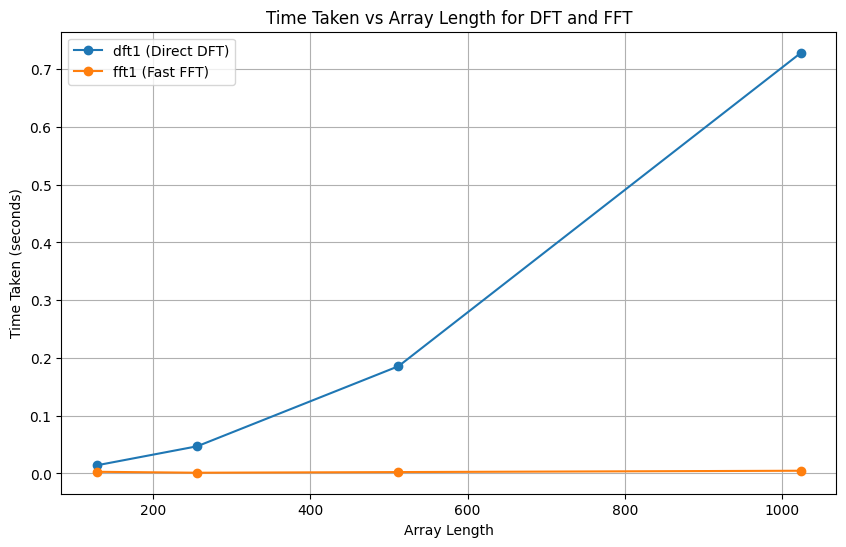

In [37]:
array_lengths = [128, 256, 512, 1024]
dft_times = []
fft_times = []

for N in array_lengths:
    test_array = np.random.random(N)
    start_time = time.time()
    dft1(test_array)
    dft_times.append(time.time() - start_time)
    start_time = time.time()
    fft1(test_array)
    fft_times.append(time.time() - start_time)

plt.figure(figsize=(10, 6))
plt.plot(array_lengths, dft_times, label="dft1 (Direct DFT)", marker='o')
plt.plot(array_lengths, fft_times, label="fft1 (Fast FFT)", marker='o')
plt.xlabel("Array Length")
plt.ylabel("Time Taken (seconds)")
plt.title("Time Taken vs Array Length for DFT and FFT")
plt.legend()
plt.grid(True)
plt.show()


### 1.6

### Steps Followed

1. **Define the Grid for x and y**
   - Create a 2D grid for x and y values using `np.linspace` and `np.meshgrid` to cover the range from 0 to \(2\pi\) for each axis.

2. **Define the Image Signals**
   - Define three image signals (`I1`, `I2`, `I3`) using sinusoidal functions of the x and y grid.

3. **Define the Min-Max Scaling Function**
   - Implement a `minmax_scale` function to scale the image signals to the range [0, 255] and convert them to `uint8`.

4. **Define the Grid for x and y with Centering**
   - Define a new 2D grid for `x` and `y` with centered values (i.e., shifting the range to have the origin at the center of the grid).

5. **Define the Image Signals with Scaling**
   - Apply the `minmax_scale` function to the scaled versions of the image signals (`i1`, `i2`, `i3`).

6. **Compute the 2D DFT and 2D FFT for Each Image Signal**
   - For each image signal, compute the 2D DFT using `dft2` and the 2D FFT using `fft2`, applying `np.fft.fftshift` to center the zero frequency component.

7. **Plotting the Results**
   - Create a 3x3 grid of subplots and:
     - Display the original image in the first column.
     - Display the magnitude of the 2D DFT in the second column.
     - Display the magnitude of the 2D FFT in the third column.
   - Add titles, remove axes, and adjust the layout for clarity.


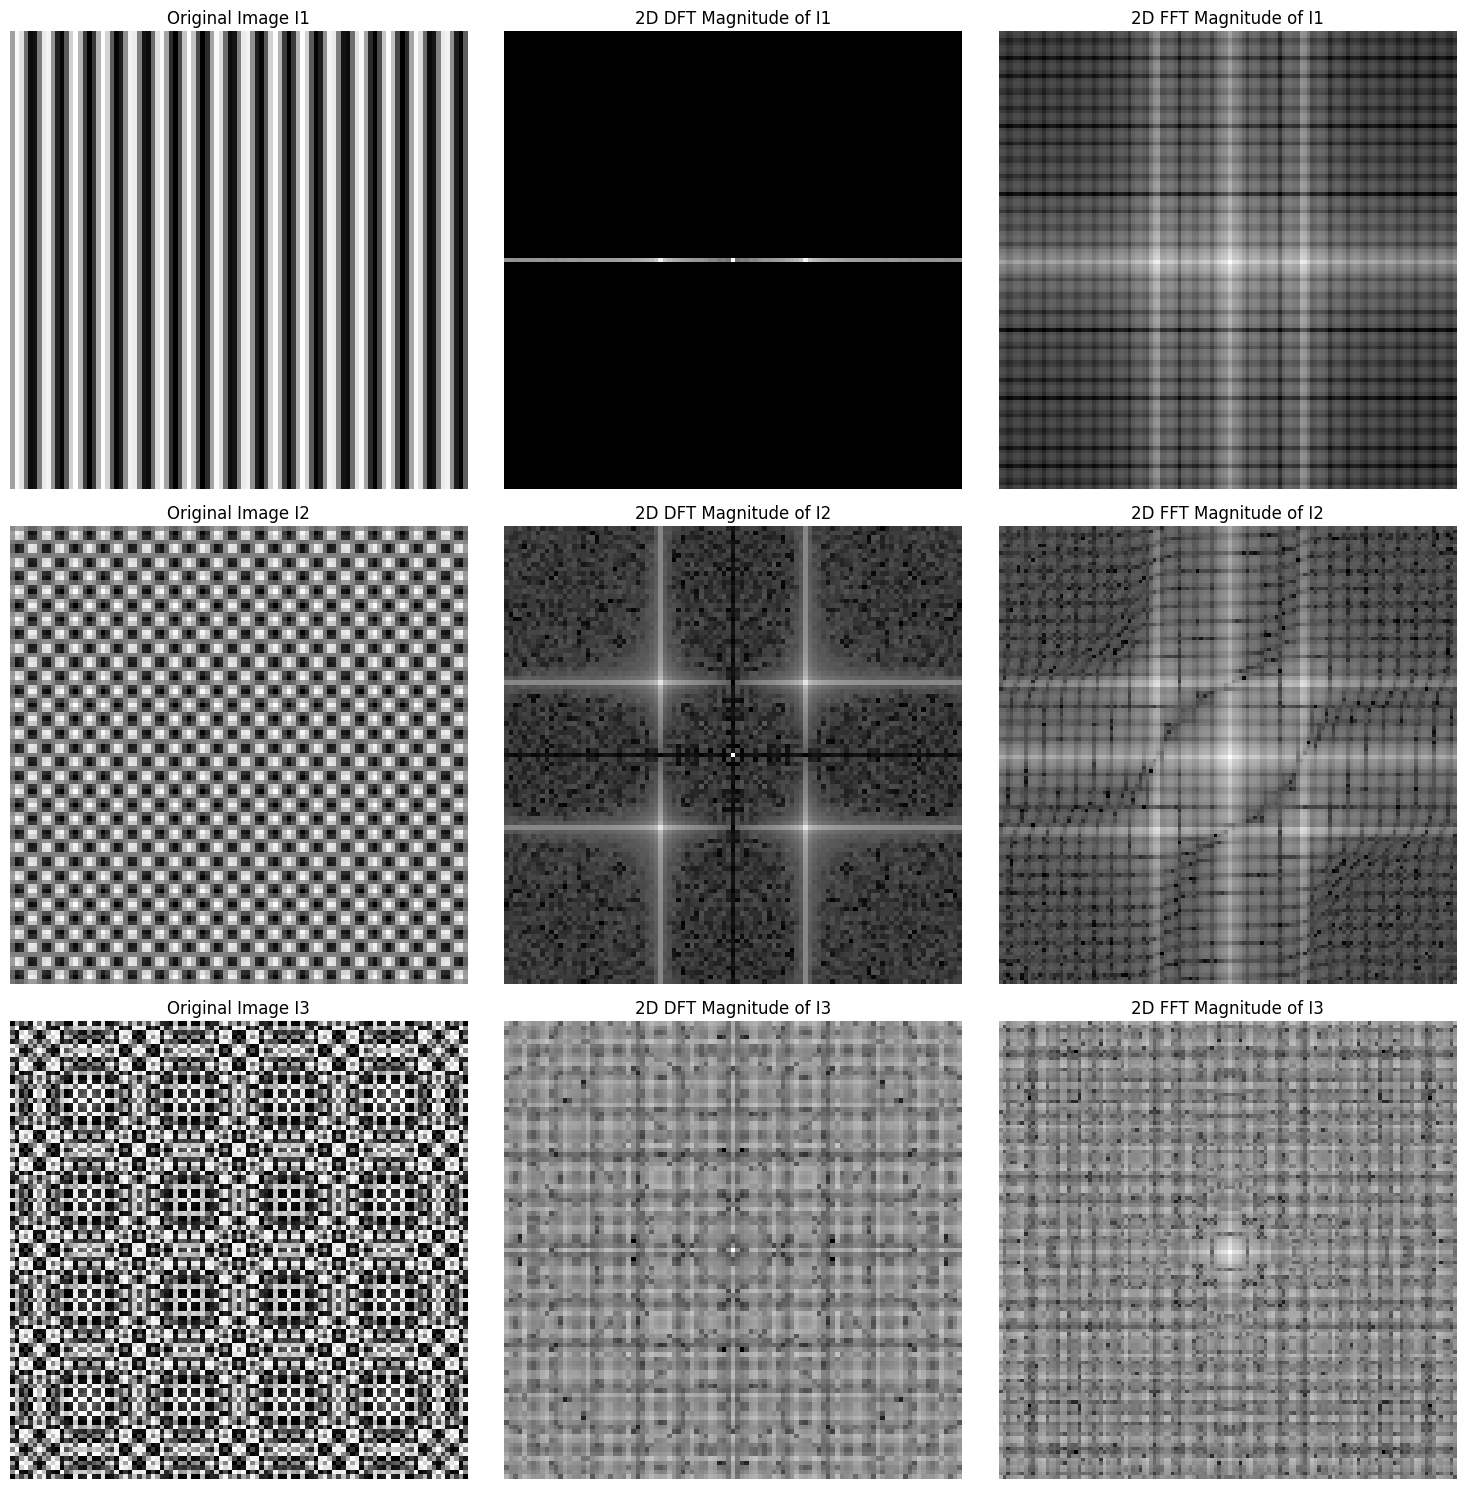

In [58]:
size = 101 
x = np.linspace(0, 2 * np.pi, size)
y = np.linspace(0, 2 * np.pi, size)
X, Y = np.meshgrid(x, y)

# Define the image signals
I1 = 0.5 * (1 + np.sin(X))
I2 = 0.5 * (1 + np.sin(X) * np.sin(Y))
I3 = 0.5 * (1 + np.sin(X**2 + Y**2))


# Define the minmax scaling function
def minmax_scale(ar):
    br = (ar - np.min(ar)) * 255 / (np.max(ar) - np.min(ar))
    br = br.astype(np.uint8)
    return br

# Define the grid for x and y
m, n = 101, 101
x = np.arange(m)
x = np.tile(x, (n, 1)) - m // 2
y = np.arange(n).reshape(n, 1)
y = np.tile(y, (1, m)) - n // 2

# Define the image signals with scaling
i1 = minmax_scale(0.5 * (1 + np.sin(x)))
i2 = minmax_scale(0.5 * (1 + np.sin(x) * np.sin(y)))
i3 = minmax_scale(0.5 * (1 + np.sin(x**2 + y**2)))

# Compute the 2D DFT and 2D FFT for each image signal
images = [i1, i2, i3]
dft_results = [np.fft.fftshift(dft2(img)) for img in images]
fft_results = [np.fft.fftshift(fft2(img)) for img in images]

# Plotting the results
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, (img, dft_result, fft_result) in enumerate(zip(images, dft_results, fft_results)):
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title(f"Original Image I{i+1}")
    axes[i, 0].axis('off')
    
    # Display the magnitude of the 2D DFT
    axes[i, 1].imshow(np.log(np.abs(dft_result) + 1), cmap='gray')
    axes[i, 1].set_title(f"2D DFT Magnitude of I{i+1}")
    axes[i, 1].axis('off')
    
    # Display the magnitude of the 2D FFT
    axes[i, 2].imshow(np.log(np.abs(fft_result) + 1), cmap='gray')
    axes[i, 2].set_title(f"2D FFT Magnitude of I{i+1}")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()



### 1.7

### Steps Followed

1. **Load the Image and Convert It to Grayscale**
   - Load an image from the specified path and convert it to grayscale using the `PIL` library. Convert the image to a numpy array for further processing.

2. **Compute the First 2D-DFT**
   - Apply the `dft2` function on the grayscale image array to compute the first 2D Discrete Fourier Transform (DFT).

3. **Apply 2D-DFT Again on the Result**
   - Compute the 2D DFT of the DFT result by applying `dft2` again on the previously computed DFT.

4. **Plotting the Results**
   - Create a 1x3 subplot layout:
     - Display the original image in the first subplot.
     - Display the magnitude of the first 2D DFT in the second subplot.
     - Display the magnitude of the second 2D DFT (Double DFT) in the third subplot.
   - Set titles, remove axes, and adjust the layout for clarity.
### Observations:

- **2D DFT Magnitude:** The 2D DFT magnitude image shows the frequency content of the original image. Bright spots indicate high-frequency components, while darker areas represent low-frequency components.

- **2D DFT of 2D DFT:** Applying DFT twice to input data results in the original signal being flipped circularly. Mathematically, for 1D:
  
  $$
  x[n] \xrightarrow{\text{N-DFT}} X[k]
  $$

  Then applying the N-DFT again:
  
  $$
  X[k] \xrightarrow{\text{N-DFT}} Y[k] = N x[-k]
  $$

  A similar result occurs for the 2D case, explaining why the output is flipped both horizontally and vertically.



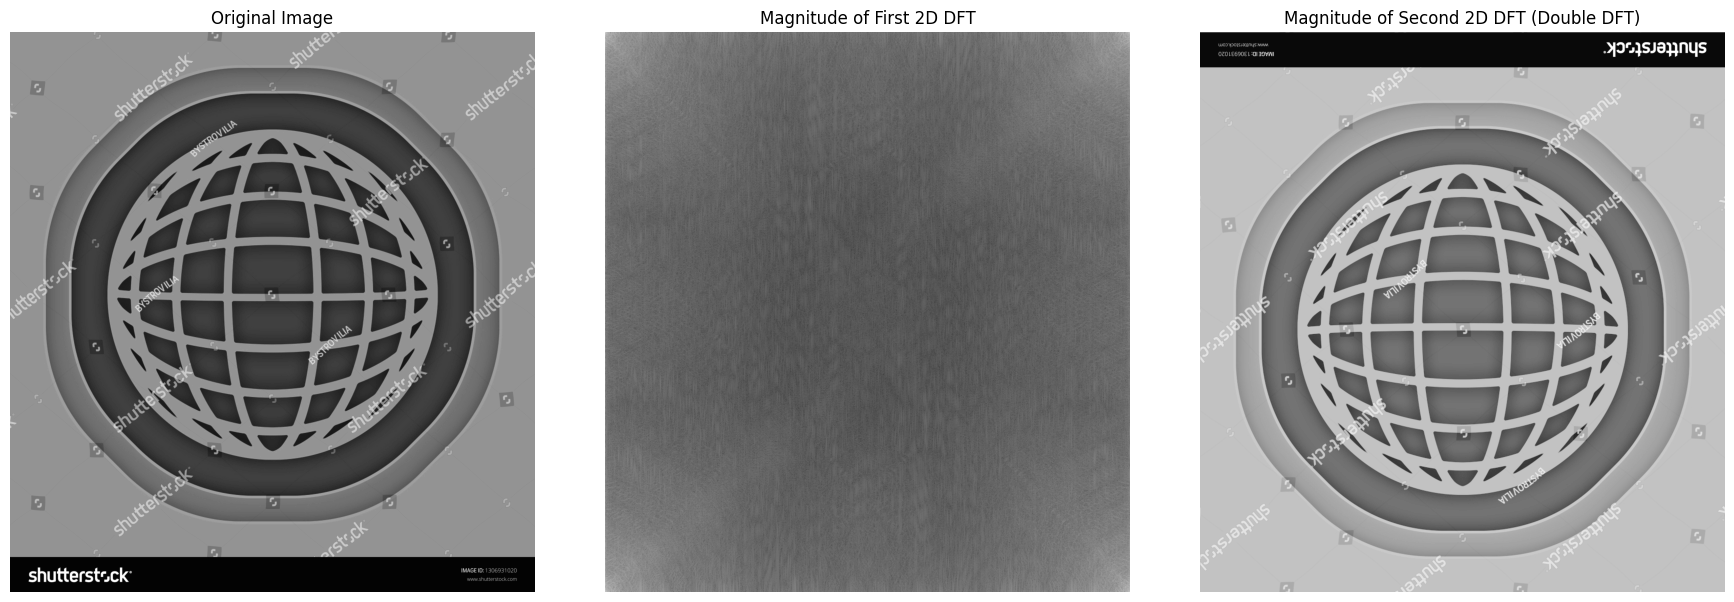

In [39]:
img = Image.open('../data/img1.jpg').convert('L')
img_array = np.array(img)

dft_result = dft2(img_array)

double_dft_result = dft2(dft_result)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original Image
axes[0].imshow(img_array, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Magnitude of the 1st 2D DFT
axes[1].imshow(np.log(np.abs(dft_result) + 1), cmap='gray')
axes[1].set_title("Magnitude of First 2D DFT")
axes[1].axis('off')

# Magnitude of the 2nd 2D DFT
axes[2].imshow(np.log(np.abs(double_dft_result) + 1), cmap='gray')
axes[2].set_title("Magnitude of Second 2D DFT (Double DFT)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

### 2.1

### Steps Followed

1. **Define the IFFT Function (Inverse FFT)**
   - Implement the `ifft1` function to compute the inverse discrete Fourier transform (IDFT) recursively. The function computes the inverse of the FFT by reversing the sign of the exponent and concatenating the results.

2. **Pad the Signal to the Next Power of 2 for Compatibility**
   - Define the `pad_to_power_of_2` function to pad the signal to the next power of 2 if necessary, ensuring compatibility with the IFFT algorithm.

3. **Apply IFFT to Reconstruct the Time-Domain Signal**
   - Apply the `ifft1` function to the padded DFT result (`dft_output_padded`) and take the real part to obtain the reconstructed signal. Truncate the result to match the original signal length.

4. **Plot the Results**
   - Create a 3-row subplot:
     - Display the original time-domain signal in the first row.
     - Plot the frequency spectrum (magnitude vs. frequency) in the second row.
     - Plot the decoded signal after applying IFFT in the third row.
   - Add appropriate titles, labels, and adjust the layout for clarity.


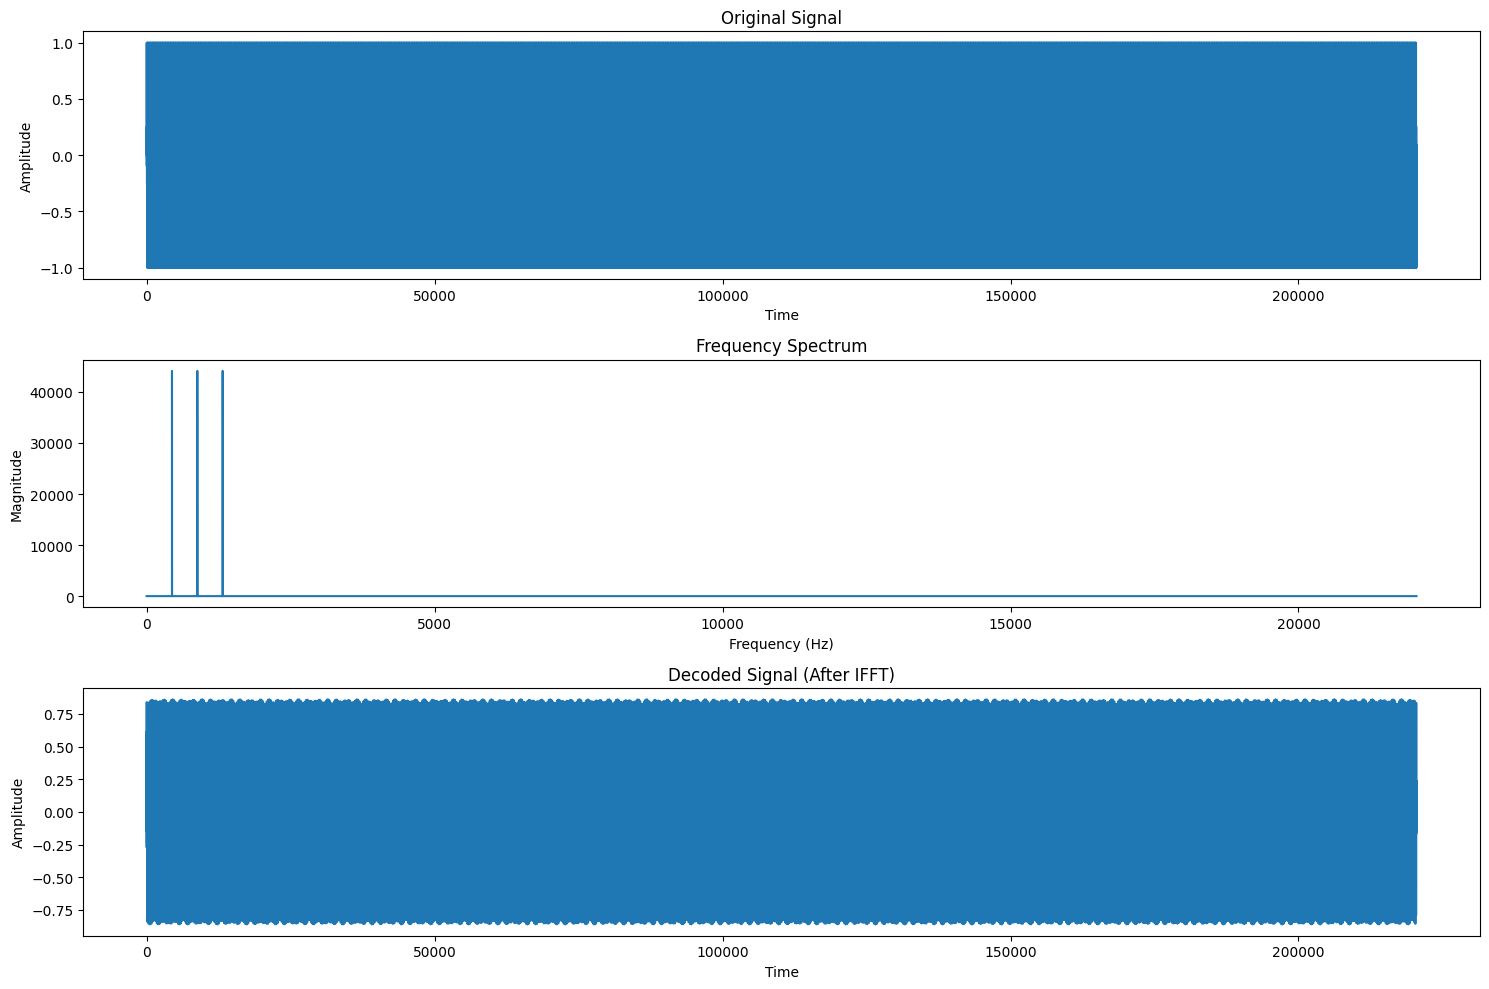

In [47]:
def ifft1(signal):
    N = len(signal)
    if N <= 1:
        return signal
    even_part = ifft1(signal[::2])
    odd_part = ifft1(signal[1::2])
    T = np.exp(2j * np.pi * np.arange(N // 2) / N) * odd_part
    return np.concatenate([even_part + T, even_part - T]) / 2

def pad_to_power_of_2(signal):
    N = len(signal)
    next_pow2 = 2 ** int(np.ceil(np.log2(N)))
    return np.pad(signal, (0, next_pow2 - N), 'constant')

dft_output_padded = pad_to_power_of_2(dft_output)

ifft_output = np.real(ifft1(dft_output_padded))[:len(audio)] 

# Plot (1) original signal, (2) frequency spectrum, and (3) decoded signal
plt.figure(figsize=(15, 10))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(audio)
plt.title("Original Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# Frequency Spectrum
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(dft_output) // 2], magnitudes[:len(dft_output) // 2])
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Decoded Signal
plt.subplot(3, 1, 3)
plt.plot(ifft_output)
plt.title("Decoded Signal (After IFFT)")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


### 2.2

### Steps Followed

1. **Load the Image without Converting to Grayscale**
   - Load the image from the specified path and convert it to a numpy array for processing.

2. **Define the IFFT2 Function Using IFFT1**
   - Implement the `ifft2` function to perform the 2D inverse Fourier transform (IFFT) by applying `ifft1` along both rows and columns of the image matrix.

3. **Check if the Image has Color Channels (RGB)**
   - Check the shape of the image to determine if it has multiple color channels (i.e., RGB). If the image has three channels, split the image into its individual color channels.

4. **Compute Fourier Transform and Inverse for Each Channel (For Color Images)**
   - Apply the 2D FFT (`fft2`) and then shift the result (`np.fft.fftshift`) for each color channel.
   - For each Fourier spectrum, apply the `ifft2` function to reconstruct the image and crop it to the original dimensions.

5. **For Grayscale Images**
   - For grayscale images, directly compute the Fourier transform using `fft2`, shift the result, and then apply `ifft2` to reconstruct the image.

6. **Plotting the Results**
   - Create a 1x3 subplot layout:
     - Display the original image in the first column.
     - Display the Fourier transform spectrum (log-scaled) in the second column.
     - Display the reconstructed image after applying IFFT in the third column.
   - Set appropriate titles, remove axes, and adjust the layout for clarity.


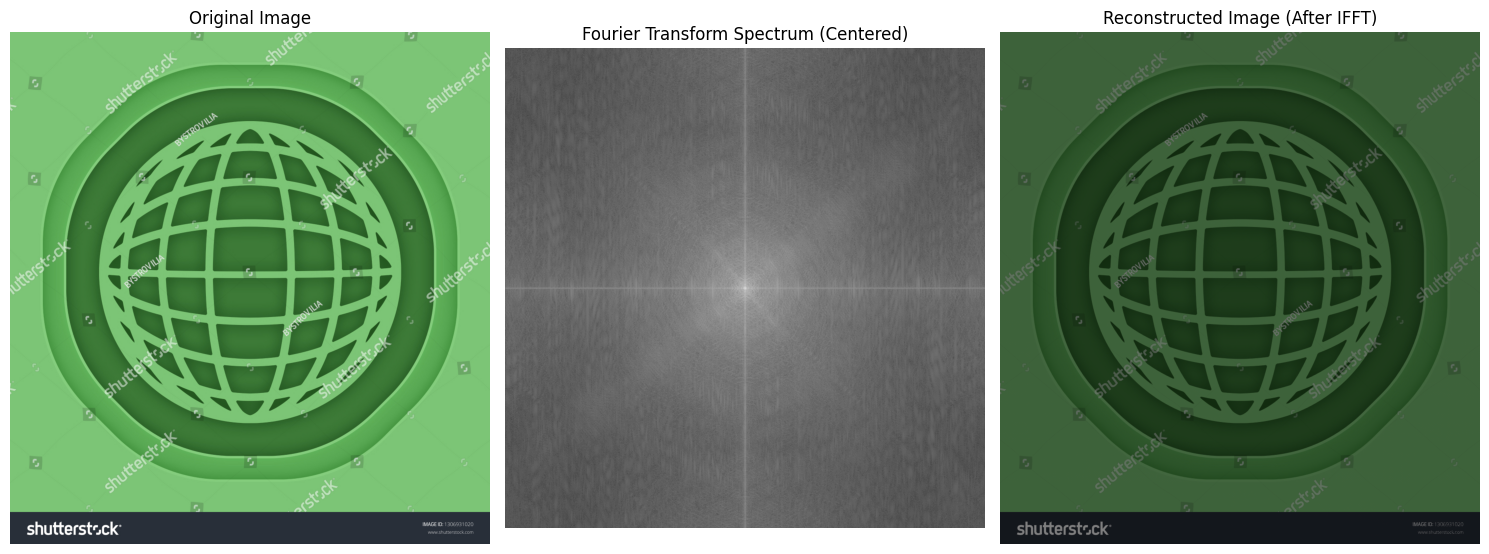

In [59]:
image = Image.open('../data/img1.jpg')
image_array = np.array(image)

def ifft2(matrix):
    row_transformed = np.array([ifft1(row) for row in matrix])
    col_transformed = np.array([ifft1(row_transformed[:, col]) for col in range(row_transformed.shape[1])]).T
    return np.real(col_transformed) 

if len(image_array.shape) == 3:
    channels = [image_array[:, :, i] for i in range(3)]
    fourier_spectrum_channels = [np.fft.fftshift(fft2(channel)) for channel in channels]
    reconstructed_channels = [
        ifft2(fourier_spectrum)[0:image_array.shape[0], 0:image_array.shape[1]]  # Crop to original dimensions
        for fourier_spectrum in fourier_spectrum_channels
    ]
    
    # Stack channels back into a color image
    reconstructed_image = np.stack(reconstructed_channels, axis=-1)
else:
    # For grayscale image
    fourier_spectrum = np.fft.fftshift(fft2(image_array))
    reconstructed_image = ifft2(fourier_spectrum)
    reconstructed_image = reconstructed_image[0:image_array.shape[0], 0:image_array.shape[1]]  # Crop to original dimensions

# Plot the original, Fourier spectrum, and reconstructed image
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_array if len(image_array.shape) == 3 else image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Fourier Spectrum
plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(fourier_spectrum_channels[0] if len(image_array.shape) == 3 else fourier_spectrum)), cmap='gray')
plt.title("Fourier Transform Spectrum (Centered)")
plt.axis('off')

# Reconstructed Image
plt.subplot(1, 3, 3)
plt.imshow(np.clip(reconstructed_image, 0, 255).astype(np.uint8))
plt.title("Reconstructed Image (After IFFT)")
plt.axis('off')

plt.tight_layout()
plt.show()

### 2.3

### Steps Followed

1. **Load the Image and Convert to Grayscale**
   - Load the image from the specified path and convert it to grayscale using the `.convert('L')` method.
   - Convert the grayscale image to a numpy array for processing.

2. **Compute the 2D FFT of the Image**
   - Apply the 2D FFT (`fft2`) to the grayscale image to obtain its frequency domain representation.

3. **Shift the Zero-Frequency Component to the Center**
   - Use `np.fft.fftshift` to shift the zero-frequency component of the FFT result to the center of the spectrum for better visualization.

4. **Compute the Magnitude and Phase Spectra**
   - Calculate the magnitude spectrum using `np.abs` and apply `log1p` for better visualization of the values.
   - Compute the phase spectrum using `np.angle` to extract the phase information from the FFT result.

5. **Plot the Results**
   - Create a 1x3 subplot layout:
     - Display the original grayscale image in the first column.
     - Display the magnitude spectrum in the second column.
     - Display the phase spectrum in the third column.
   - Set appropriate titles, remove axes, and adjust the layout for better clarity.


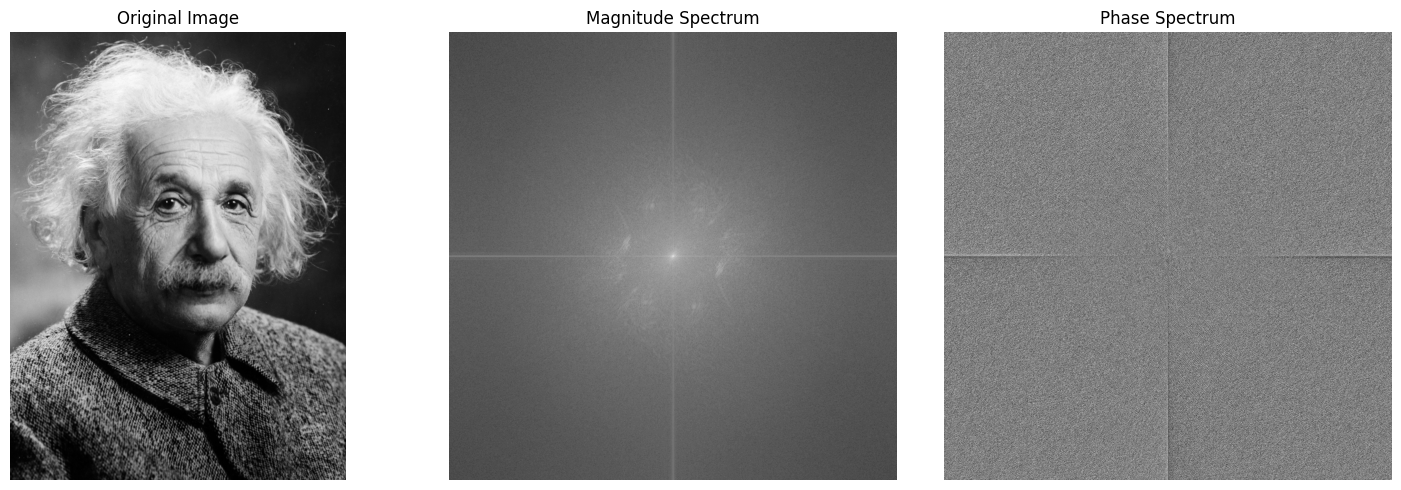

In [51]:
image_path = '../data/ein.jpeg'
image = Image.open(image_path).convert('L')
image_array = np.array(image)

fft_img = fft2(image_array)

fft_shift = np.fft.fftshift(fft_img)

magnitude_spectrum = np.log1p(np.abs(fft_shift)) 
phase_spectrum = np.angle(fft_shift)

plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

# Phase Spectrum
plt.subplot(1, 3, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.title("Phase Spectrum")
plt.axis('off')

plt.tight_layout()
plt.show()


### 2.4

### Steps Followed

1. **Extract the Magnitude Spectrum**
   - Compute the magnitude spectrum by taking the absolute value of the shifted FFT result.

2. **Create a Random Phase Spectrum**
   - Generate a random phase spectrum with values uniformly distributed between `-π` and `π`, having the same shape as the magnitude spectrum.

3. **Combine Magnitude and Random Phase to Form a New Fourier Spectrum**
   - Multiply the magnitude spectrum by the exponential of the imaginary unit times the random phase spectrum to form a new Fourier spectrum.

4. **Apply Inverse `fftshift` and Inverse FFT to Reconstruct the Image**
   - Use `np.fft.ifftshift` to undo the shift applied previously to the FFT.
   - Apply the inverse FFT (`ifft2`) to the combined spectrum to reconstruct the image from the modified frequency domain.

5. **Plotting the Results**
   - Create a 1x4 subplot layout:
     - Display the magnitude spectrum with a logarithmic scale in the first column.
     - Show the random phase spectrum in the second column.
     - Show the combined spectrum (magnitude with random phase) in the third column.
     - Display the reconstructed image in the fourth column.
   - Set appropriate titles, remove axes, and adjust the layout for clarity.


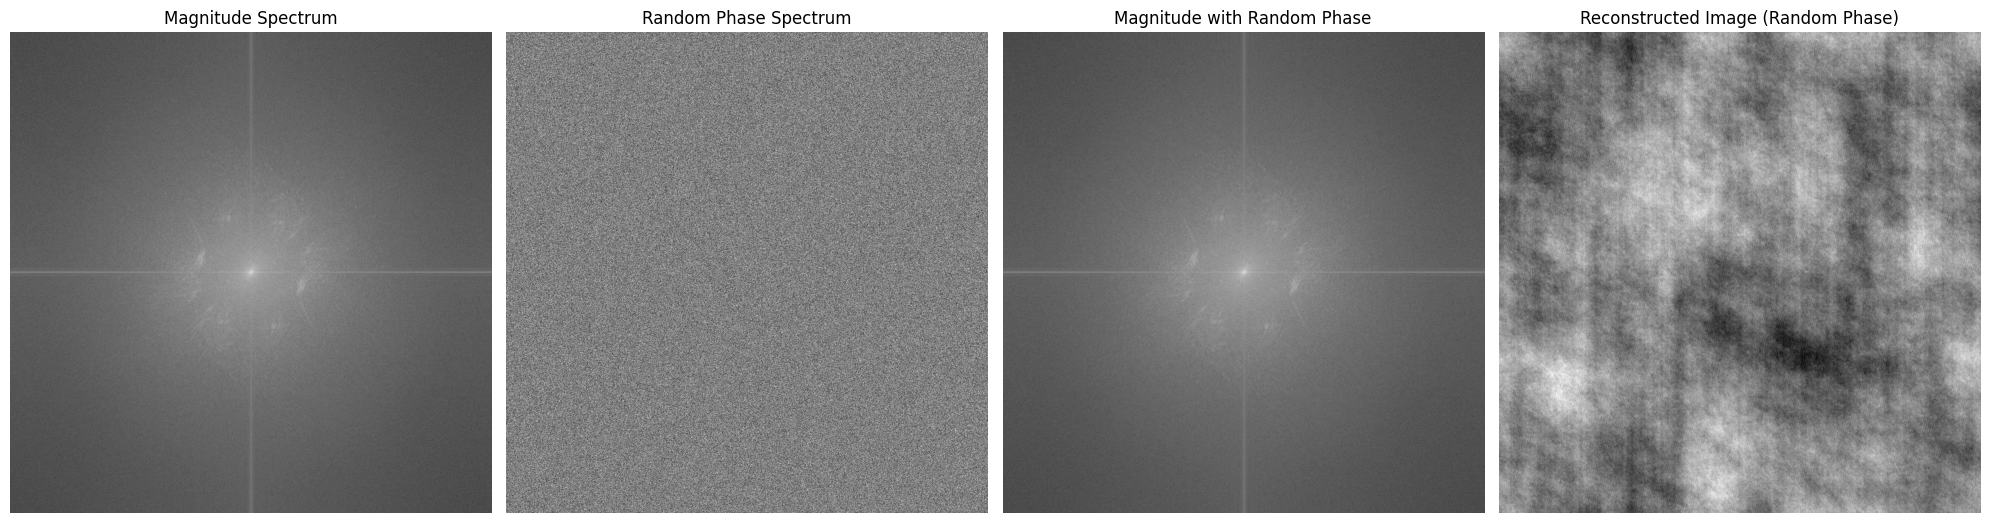

In [53]:
magnitude_spectrum = np.abs(fft_shift)
random_phase = np.random.uniform(-np.pi, np.pi, magnitude_spectrum.shape)

combined_spectrum = magnitude_spectrum * np.exp(1j * random_phase)

ifft_shifted = np.fft.ifftshift(combined_spectrum)
reconstructed_image = np.real(ifft2(ifft_shifted))

# Plotting
plt.figure(figsize=(20, 10))

# Magnitude Spectrum (log scale for better visibility)
plt.subplot(1, 4, 1)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

# Random Phase Spectrum
plt.subplot(1, 4, 2)
plt.imshow(random_phase, cmap='gray')
plt.title("Random Phase Spectrum")
plt.axis('off')

# Combined Spectrum (Magnitude with Random Phase)
plt.subplot(1, 4, 3)
plt.imshow(np.log1p(np.abs(combined_spectrum)), cmap='gray')
plt.title("Magnitude with Random Phase")
plt.axis('off')

# Inverse FFT of Combined Spectrum
plt.subplot(1, 4, 4)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image (Random Phase)")
plt.axis('off')

plt.tight_layout()
plt.show()


### 2.5

Steps followed:

1. **Extracting the Original Magnitude and Phase Spectra**: 
   - The magnitude and phase spectra of the Fourier-transformed image are computed from the FFT shift.

2. **Calculating the Mean Magnitude**:
   - The mean magnitude is computed by averaging the values of the original magnitude spectrum.

3. **Creating a Constant Magnitude Spectrum**:
   - A new constant magnitude spectrum is created, where all the values are set to the calculated mean magnitude.

4. **Combining the Constant Magnitude with the Original Phase**:
   - The constant magnitude spectrum is combined with the original phase spectrum to form a new complex Fourier spectrum.

5. **Inverse FFT Process**:
   - The `ifftshift` function is applied to shift the zero-frequency component back.
   - The inverse FFT (`ifft2`) is applied to reconstruct the image from the new Fourier spectrum.

6. **Plotting the Results**:
   - The following subplots are created for visualization:
     - **Constant Magnitude Spectrum**: Displays the constant magnitude spectrum with a logarithmic scale for better visibility.
     - **Original Phase Spectrum**: Displays the phase spectrum of the image.
     - **Combined Spectrum (Constant Magnitude with Original Phase)**: Shows the new Fourier spectrum combining the constant magnitude and original phase.
     - **Reconstructed Image**: Shows the image obtained after applying the inverse FFT with the new spectrum.


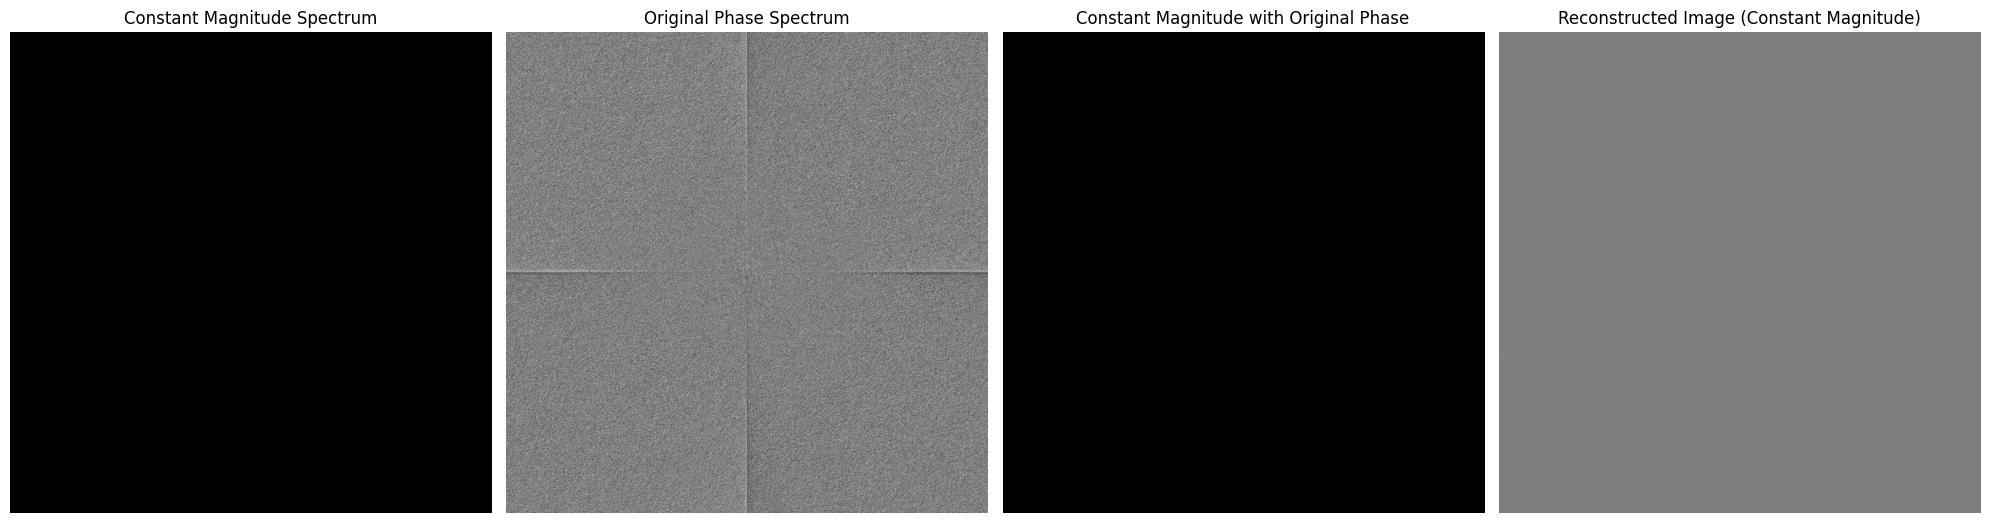

In [55]:
original_magnitude = np.abs(fft_shift)
original_phase = np.angle(fft_shift)

mean_magnitude = np.mean(original_magnitude)

constant_magnitude_spectrum = np.full(original_magnitude.shape, mean_magnitude)

combined_spectrum = constant_magnitude_spectrum * np.exp(1j * original_phase)

ifft_shifted = np.fft.ifftshift(combined_spectrum)
reconstructed_image = np.real(ifft2(ifft_shifted))

# Plotting
plt.figure(figsize=(20, 10))

# Constant Magnitude Spectrum
plt.subplot(1, 4, 1)
plt.imshow(np.log1p(constant_magnitude_spectrum), cmap='gray')
plt.title("Constant Magnitude Spectrum")
plt.axis('off')

# Original Phase Spectrum
plt.subplot(1, 4, 2)
plt.imshow(original_phase, cmap='gray')
plt.title("Original Phase Spectrum")
plt.axis('off')

# Combined Spectrum (Constant Magnitude with Original Phase)
plt.subplot(1, 4, 3)
plt.imshow(np.log1p(np.abs(combined_spectrum)), cmap='gray')
plt.title("Constant Magnitude with Original Phase")
plt.axis('off')

# Inverse FFT of Combined Spectrum
plt.subplot(1, 4, 4)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image (Constant Magnitude)")
plt.axis('off')

plt.tight_layout()
plt.show()


### 3

### Steps Followed:

1. **Load the Image in Grayscale**  
   - Load the fingerprint image in grayscale from the specified file path.

2. **Apply Gaussian Blur for Lowpass Filtering**  
   - Use Gaussian Blur to create a lowpass-filtered version of the image, which reduces high-frequency noise.

3. **Create Highpass Filter**  
   - Generate a highpass-filtered image by subtracting the lowpass-filtered image from the original.

4. **Enhance Edges by Combining with Original**  
   - Combine the original image with the highpass-filtered image using weighted addition to enhance edges.

5. **Convert Grayscale Images to Color**  
   - Convert both the original and enhanced grayscale images to color format, specifically for display.

6. **Display Original and Enhanced Images**  
   - Display the original and enhanced images side-by-side for visual comparison.


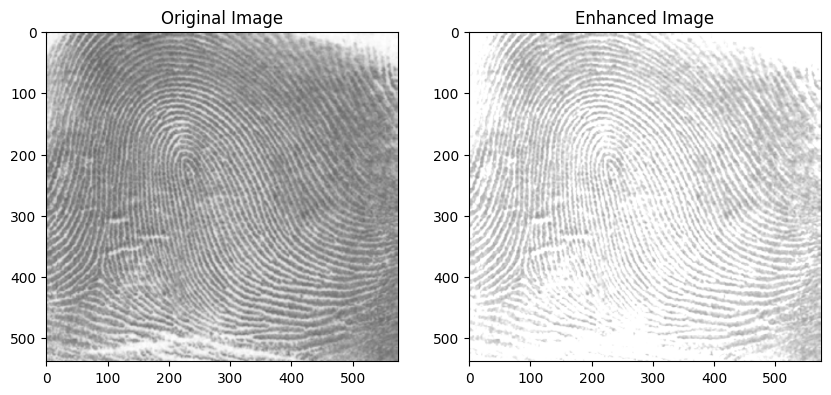

In [67]:
image_path = '../data/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

lowpass_filtered = cv2.GaussianBlur(image, (5, 5), 0)
highpass_filtered = cv2.subtract(image, lowpass_filtered)
enhanced_image = cv2.addWeighted(image, 1.5, highpass_filtered, -0.5, 0)
original_colored = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
enhanced_colored = cv2.cvtColor(enhanced_image, cv2.COLOR_GRAY2RGB)

# Display the original and enhanced images in color
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_colored)

plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.imshow(enhanced_colored)

plt.show()


### 4

### Steps Followed:

1. **Load and Convert Image to RGB**  
   - Load the image and convert it from BGR to RGB color space for consistent display.

2. **Apply High-Pass Filtering**  
   - Define and apply a high-pass filter using a sharpening kernel to enhance edges.

3. **Apply Low-Pass Filtering**  
   - Apply a low-pass filter (average blur) to smooth the image and reduce noise.

4. **Combine High-Pass and Low-Pass Filtered Images**  
   - Blend the low-pass and high-pass filtered images using weighted addition to achieve a balance of sharpness and smoothness.

5. **Resize the Combined Image**  
   - Resize the resulting image by scaling it up with cubic interpolation to enhance resolution.

6. **Display Original and Final Images**  
   - Display the original and final (resized and combined) images side-by-side for comparison.


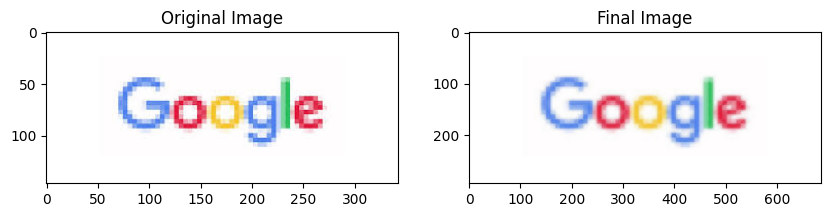

In [2]:
img = cv2.imread('../data/google.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel_size = 5 
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
highpass_img = cv2.filter2D(img, -1, kernel)

lowpass_img = cv2.blur(img, (5, 5)) 
combined_img = cv2.addWeighted(lowpass_img, 0.8, highpass_img, 0.2, 0)
resized_img = cv2.resize(combined_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(resized_img)
plt.title('Final Image')
plt.show()

### 5

### Steps Followed:

1. **Load and Convert Image to RGB**  
   - Load the input image and convert it to RGB format.

2. **Initialize Array for Filtered Channels**  
   - Set up an empty array to store filtered color channels.

3. **Define Band-Stop Filter Parameters**  
   - Define inner (`r1`) and outer (`r2`) radii for the band-stop filter, controlling which frequencies will be suppressed.

4. **Apply Filtering to Each Color Channel**  
   - For each color channel (Red, Green, Blue):
     - Extract the channel.
     - Compute the 2D Fourier Transform and shift zero frequencies to the center.
     - Calculate the magnitude spectrum of the shifted frequency domain.
     - Create a circular band-stop filter mask based on specified radii.
     - Apply the band-stop filter mask to the frequency domain.
     - Perform an inverse Fourier Transform to return to the spatial domain.
     - Store the filtered channel data.

5. **Normalize the Filtered Image**  
   - Clip pixel values to ensure they fall within valid 8-bit range (0-255) and convert to `uint8` format.

6. **Compute Magnitude Spectrum for Visualization**  
   - Compute the magnitude spectrum of the first color channel to visualize the frequencies present in the image.

7. **Create Visualization for Band-Stop Filter**  
   - Create a visualization of the band-stop filter mask applied to the first channel’s magnitude spectrum.

8. **Display Results**  
   - Display the original image, magnitude spectrum, band-stop kernel, filtered magnitude spectrum, and recovered image side-by-side for comparison.


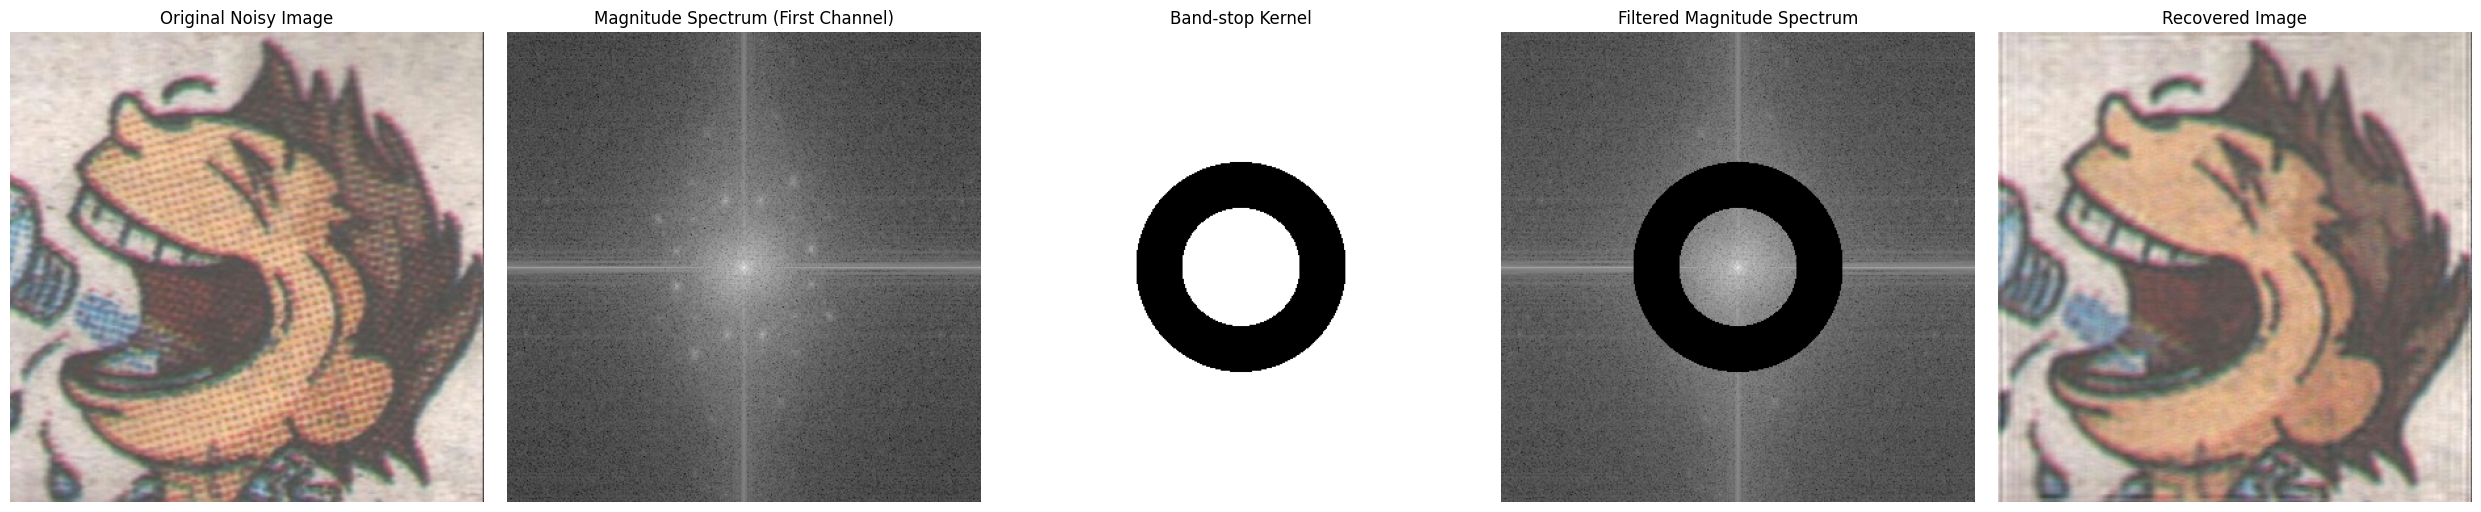

In [74]:
def filterImage_color(img_path):
    img = Image.open(img_path).convert('RGB')
    img_np = np.array(img)
    img_back = np.zeros_like(img_np, dtype=np.float32)
    
    r1 = 45
    r2 = 80
    
    for channel in range(3):  # 0=Red, 1=Green, 2=Blue
        # Extract the channel
        single_channel = img_np[:, :, channel]

        # Apply FFT
        f = np.fft.fft2(single_channel)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = np.log(1 + np.abs(fshift))
        
        # Create a band-stop filter mask
        center_x, center_y = (single_channel.shape[1] - 1) / 2, (single_channel.shape[0] - 1) / 2
        y, x = np.ogrid[:single_channel.shape[0], :single_channel.shape[1]]
        distance_from_center = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
        
        kernel = np.ones(single_channel.shape, dtype=np.float32)
        kernel[(distance_from_center >= r1) & (distance_from_center <= r2)] = 0  # Band-stop
        
        # Apply the filter in frequency domain
        fshift_filtered = fshift * kernel
        
        # Inverse FFT to get the filtered image back
        f_ishift = np.fft.ifftshift(fshift_filtered)
        img_back_channel = np.fft.ifft2(f_ishift)
        img_back_channel = np.abs(img_back_channel)
        
        # Store the filtered channel
        img_back[:, :, channel] = img_back_channel
    
    # Normalize the image to uint8
    img_back = np.clip(img_back, 0, 255)
    img_back = img_back.astype(np.uint8)
    
    # Compute the magnitude spectrum for visualization (using the first channel)
    f = np.fft.fft2(img_np[:, :, 0])
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(1 + np.abs(fshift))
    
    # Create a band-stop filter mask for visualization (using the first channel)
    center_x, center_y = (img_np.shape[1] - 1) / 2, (img_np.shape[0] - 1) / 2
    y, x = np.ogrid[:img_np.shape[0], :img_np.shape[1]]
    distance_from_center = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
    
    kernel = np.ones(img_np.shape[:2], dtype=np.float32)
    kernel[(distance_from_center >= r1) & (distance_from_center <= r2)] = 0  # Band-stop
    
    # Plotting
    fig, axs = plt.subplots(1, 5, figsize=(25, 5))
    
    axs[0].imshow(img_np)
    axs[0].set_title('Original Noisy Image')
    axs[0].axis('off')
    
    axs[1].imshow(magnitude_spectrum, cmap='gray')
    axs[1].set_title('Magnitude Spectrum (First Channel)')
    axs[1].axis('off')
    
    axs[2].imshow(kernel, cmap='gray')
    axs[2].set_title('Band-stop Kernel')
    axs[2].axis('off')
    
    axs[3].imshow(kernel * magnitude_spectrum, cmap='gray')
    axs[3].set_title('Filtered Magnitude Spectrum')
    axs[3].axis('off')
    
    axs[4].imshow(img_back)
    axs[4].set_title('Recovered Image')
    axs[4].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
filterImage_color('../data/cart.jpg')


### Steps Followed:

1. **Load Image in Grayscale**  
   - Load the image in grayscale mode for artifact removal.

2. **Compute Fourier Transform and Shift**  
   - Apply a 2D Fourier Transform and shift the zero-frequency component to the center for better analysis of frequency components.

3. **Define Band-Stop Filter Parameters**  
   - Specify the inner (`r1`) and outer (`r2`) radii to define the frequency range for the band-stop filter, controlling which frequency band will be removed.

4. **Create Band-Stop Filter Mask**  
   - Create a circular mask with a region that will filter out frequencies between `r1` and `r2`, effectively removing certain artifacts from the image.

5. **Apply Band-Stop Filter in Frequency Domain**  
   - Apply the mask to the Fourier-transformed image to filter out the specified frequency band.

6. **Inverse Fourier Transform to Spatial Domain**  
   - Perform an inverse Fourier Transform to convert the filtered image back into the spatial domain.

7. **Normalize the Filtered Image**  
   - Normalize pixel values to improve visualization, mapping them to the full grayscale range.

8. **Display Original, Masked Spectrum, and Filtered Image**  
   - Display the original image, masked frequency spectrum, and the recovered (artifact-removed) grayscale image for visual comparison.


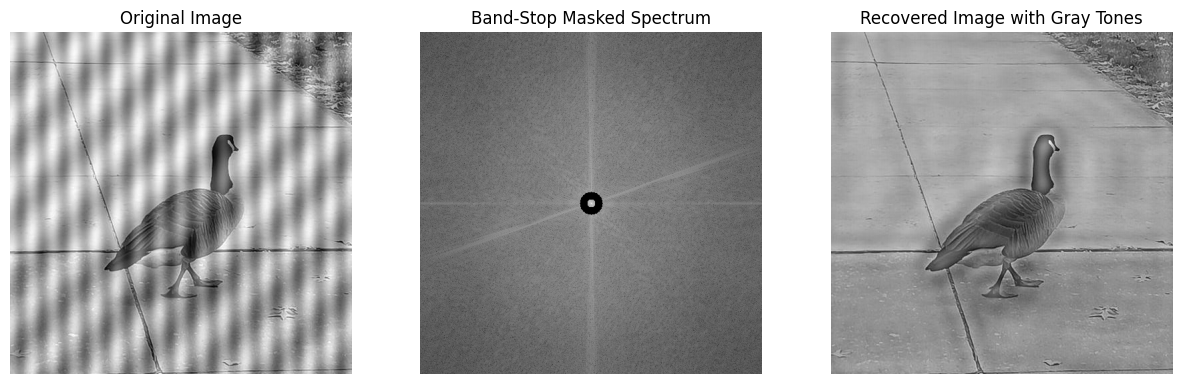

In [122]:
def remove_artifacts_band_stop(img_path):
    img = Image.open(img_path).convert('L')
    img_np = np.array(img)
    
    f = np.fft.fft2(img_np)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(1 + np.abs(fshift))
    rows, cols = img_np.shape
    crow, ccol = rows // 2 , cols // 2

    # Define inner and outer radius for the band-stop filter
    r1 = 6  
    r2 = 17 

    # Create circular mask with a band-stop region
    mask = np.ones((rows, cols), np.uint8)
    center_y, center_x = np.ogrid[:rows, :cols]
    distance = np.sqrt((center_x - ccol)**2 + (center_y - crow)**2)
    mask[(distance >= r1) & (distance <= r2)] = 0  # Band-stop region

    # Apply the mask in the frequency domain
    fshift_filtered = fshift * mask
    
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

    # Plot the results
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img_np, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    axs[1].imshow(mask * magnitude_spectrum, cmap='gray')
    axs[1].set_title('Band-Stop Masked Spectrum')
    axs[1].axis('off')
    
    axs[2].imshow(img_back, cmap='gray')
    axs[2].set_title('Recovered Image with Gray Tones')
    axs[2].axis('off')
    
    plt.show()

remove_artifacts_band_stop('../data/bird.png')


### 6

### Steps Followed:

1. **Load the Image in Grayscale**  
   - Load the input image and convert it to grayscale for easier processing.

2. **Apply Gaussian Blur to Reduce Noise**  
   - Use Gaussian Blur to reduce noise and smooth the image, making further processing more effective.

3. **Apply Adaptive Thresholding**  
   - Use adaptive thresholding to create a binary inverted image, where objects (coins) are highlighted.

4. **Perform Morphological Closing**  
   - Apply morphological closing (dilation followed by erosion) to fill small gaps inside the coin shapes and improve the detection.

5. **Perform Distance Transform**  
   - Apply the distance transform to highlight the foreground and separate objects from the background.

6. **Normalize and Threshold the Distance Transform**  
   - Normalize the distance transform and apply a threshold to identify the "sure foreground" areas, marking where the coins are.

7. **Dilate to Separate Coins and Remove Small Gaps**  
   - Dilate the sure foreground to further separate coins and remove small gaps or noise.

8. **Detect Contours to Count Coins**  
   - Detect contours in the dilated image and filter out small contours based on area to isolate the coins.

9. **Plot Results**  
   - Display the original image, Gaussian-blurred image, adaptive thresholded image, distance transform, sure foreground, and final image with detected coin contours.
   
10. **Return the Number of Detected Coins**  
    - Count and display the number of coins detected based on filtered contours.


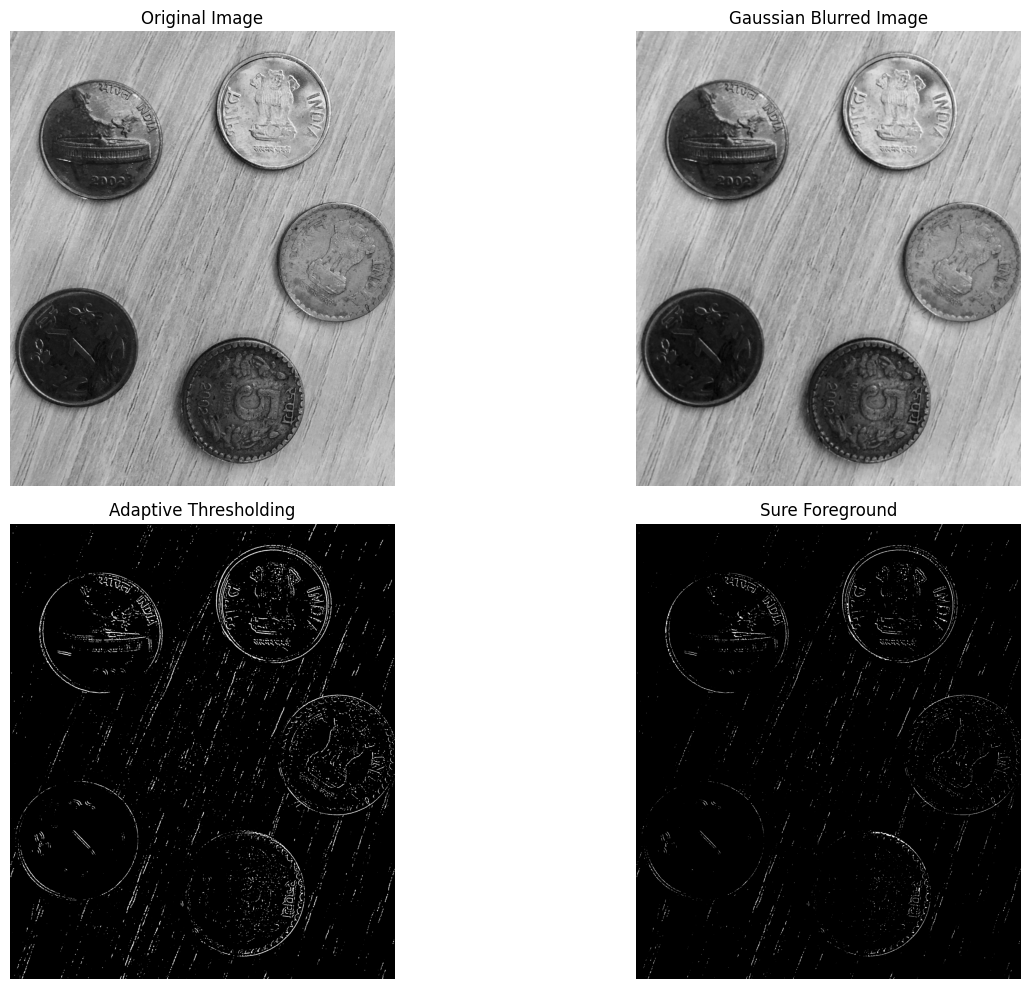

5

In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import time
from PIL import Image
import cv2

image_path = '../data/coin-detection.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (11, 11), 0)
thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 5)

kernel = np.ones((3, 3), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

dist_transform = cv2.distanceTransform(closed, cv2.DIST_L2, 5)

dist_transform = cv2.normalize(dist_transform, None, 0, 1.0, cv2.NORM_MINMAX)
_, sure_fg = cv2.threshold(dist_transform, 0.1429,0.5, cv2.THRESH_BINARY)
sure_fg = np.uint8(sure_fg * 255)

dilated_image = cv2.dilate(sure_fg, kernel, iterations=3)

contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

coin_contours = [cnt for cnt in contours if 3300 < cv2.contourArea(cnt) < 5000]
num_coins = len(coin_contours)

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(blurred_image, cmap='gray')
axs[0, 1].set_title('Gaussian Blurred Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(thresh, cmap='gray')
axs[1, 0].set_title('Adaptive Thresholding')
axs[1, 0].axis('off')

# axs[1, 0].imshow(dist_transform, cmap='jet')
# axs[1, 0].set_title('Distance Transform')
# axs[1, 0].axis('off')

axs[1, 1].imshow(sure_fg, cmap='gray')
axs[1, 1].set_title('Sure Foreground')
axs[1, 1].axis('off')

# Drawing contours on the original image for visualization
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, coin_contours, -1, (0, 255, 0), 2)
# axs[1, 2].imshow(contour_image)
# axs[1, 2].set_title('Detected Coins')
# axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

num_coins


### 7

### Steps Followed:

1. **Load Image with Transparency**  
   - Load the image with transparency (alpha channel) using `cv2.IMREAD_UNCHANGED`.

2. **Extract Alpha Channel or Convert to Grayscale**  
   - If the image has an alpha channel (transparency), extract it and create a binary image based on thresholding.
   - If no alpha channel exists, convert the image to grayscale and threshold it to create a binary image.

3. **Apply Adaptive Thresholding**  
   - Use adaptive thresholding to preserve image details, particularly useful for complex or detailed images.

4. **Apply Morphological Opening**  
   - Apply morphological opening to remove small noise while preserving the edges and details of the image.

5. **Invert the Binary Image**  
   - Invert the binary image so that the foreground (skeleton) becomes white on a black background, preparing it for skeletonization.

6. **Skeletonization Using Zhang-Suen or Alternative Method**  
   - Attempt to use Zhang-Suen thinning if available (from `cv2.ximgproc`).
   - If not available, apply an iterative morphological method to obtain a skeletonized image.

7. **Invert Skeleton Image for Visualization**  
   - Invert the skeleton image back to a white-on-black format for better visualization of the skeleton.

8. **Display Original and Skeletonized Images**  
   - Display the original image (with transparency) and the resulting skeletonized image side-by-side for comparison.


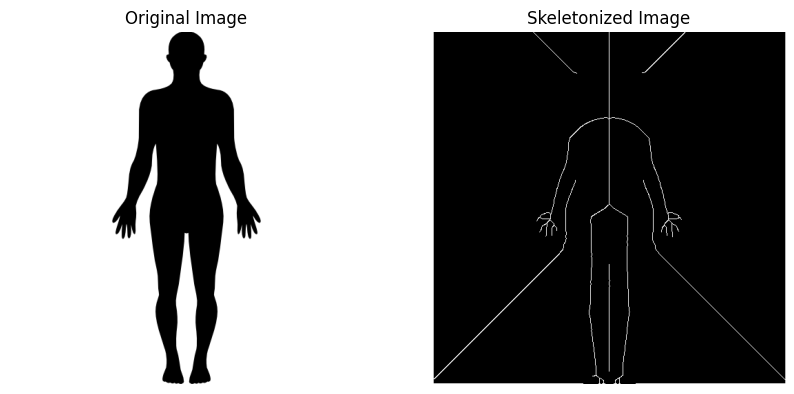

In [5]:
image_path = '../data/human.png'
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

if image.shape[2] == 4:  # Check for alpha channel
    alpha_channel = image[:, :, 3]
    _, binary_image = cv2.threshold(alpha_channel, 25, 255, cv2.THRESH_BINARY)
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

binary_image = cv2.adaptiveThreshold(binary_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY, 11, 2)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# binary_image = cv2.bitwise_not(binary_image)

if hasattr(cv2, 'ximgproc') and hasattr(cv2.ximgproc, 'thinning'):
    skeleton = cv2.ximgproc.thinning(binary_image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
else:
    skeleton = np.zeros(binary_image.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    while True:
        eroded = cv2.erode(binary_image, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary_image, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        binary_image = eroded.copy()
        if cv2.countNonZero(binary_image) == 0:
            break

# skeleton = cv2.bitwise_not(skeleton)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap='gray')
plt.title("Skeletonized Image")
plt.axis("off")

plt.show()


### 8

### Steps Followed:

1. **Load the Image in Grayscale**  
   - Read the fingerprint image in grayscale to simplify processing and reduce computation.

2. **Apply Median Filter to Reduce Salt-and-Pepper Noise**  
   - Use a median filter to reduce salt-and-pepper noise, which is commonly found in fingerprint images.

3. **Apply Gabor Filter for Ridge Enhancement**  
   - Apply Gabor filters at 0 and 90 degrees to enhance the ridge structure in the fingerprint image.
   - Combine the filtered images to capture ridge features from multiple directions.

4. **Thresholding Using Otsu's Method**  
   - Use Otsu's method for thresholding, which automatically calculates an optimal threshold for binary image segmentation.

5. **Apply Morphological Operations to Clean Up Small Noise**  
   - Perform morphological closing to fill small gaps and morphological opening to remove small noise and irregularities in the thresholded image.

6. **Skeletonization Using Thinning (Guo-Hall Algorithm)**  
   - Apply the Guo-Hall thinning algorithm to obtain the skeletonized version of the fingerprint, preserving its structural features.

7. **Display Results**  
   - Display the original, median filtered, Gabor filtered, thresholded, morphologically cleaned, and skeletonized images for visualization and comparison.


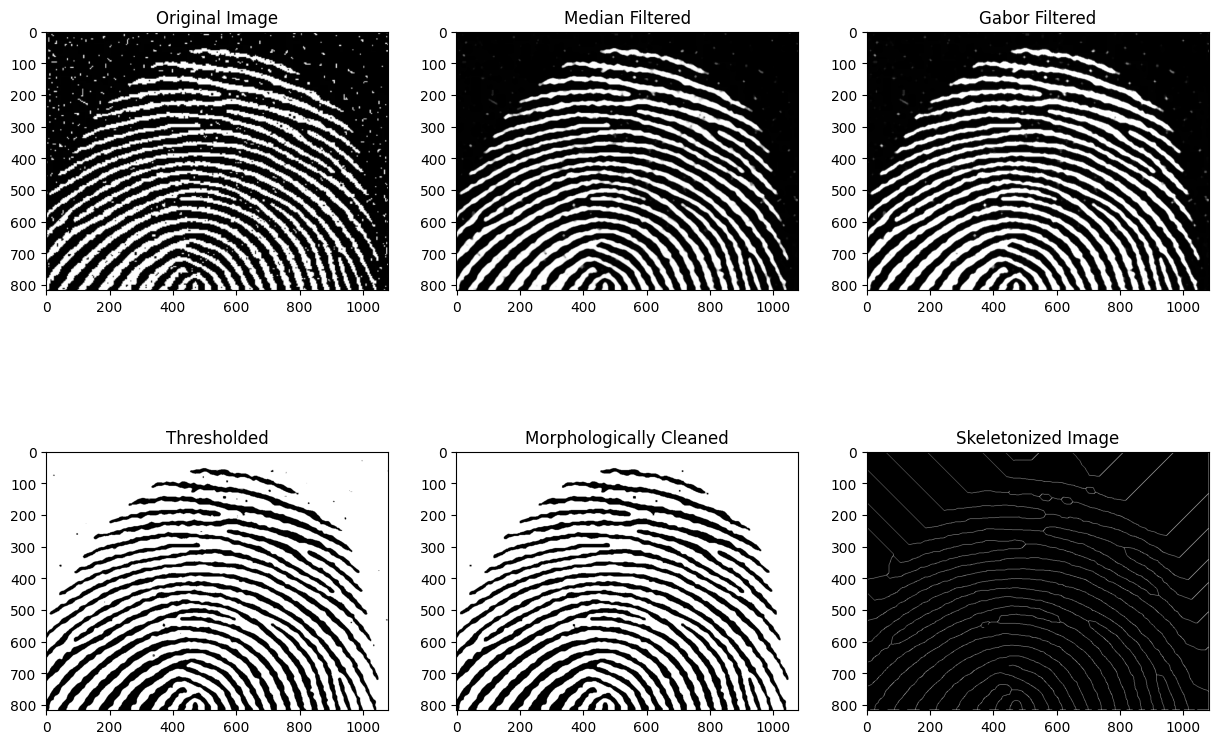

In [56]:
def clean_fingerprint(img_path):
    img = cv2.imread(img_path, 0)
    
    img_filtered = cv2.medianBlur(img, 11)
    
    kernel_size = 13  
    sigma = 1.0
    lambd = 3
    gamma = 0.5

    # Gabor kernels at 0 and 90 degrees
    kernel_0 = cv2.getGaborKernel((kernel_size, kernel_size), sigma, 0, lambd, gamma, 0, ktype=cv2.CV_32F)
    kernel_90 = cv2.getGaborKernel((kernel_size, kernel_size), sigma, np.pi/2, lambd, gamma, 0, ktype=cv2.CV_32F)
    
    # Filter image with both kernels and combine
    filtered_0 = cv2.filter2D(img_filtered, cv2.CV_8UC3, kernel_0)
    filtered_90 = cv2.filter2D(img_filtered, cv2.CV_8UC3, kernel_90)
    filtered = cv2.addWeighted(filtered_0, 0.5, filtered_90, 0.5, 0)
    
    _, thresh = cv2.threshold(filtered, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Morphological operations to clean up small noise
    kernel = np.ones((3, 3), np.uint8)
    morphed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)  # Closing to fill gaps
    morphed = cv2.morphologyEx(morphed, cv2.MORPH_OPEN, kernel, iterations=3)   # Opening to remove noise
    
    # Skeletonization using thinning (Guo-Hall algorithm)
    skel = cv2.ximgproc.thinning(morphed, cv2.ximgproc.THINNING_GUOHALL)
    
    # Display the results
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(2, 3, 2), plt.imshow(img_filtered, cmap='gray'), plt.title('Median Filtered')
    plt.subplot(2, 3, 3), plt.imshow(filtered, cmap='gray'), plt.title('Gabor Filtered')
    plt.subplot(2, 3, 4), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded')
    plt.subplot(2, 3, 5), plt.imshow(morphed, cmap='gray'), plt.title('Morphologically Cleaned')
    plt.subplot(2, 3, 6), plt.imshow(skel, cmap='gray'), plt.title('Skeletonized Image')
    plt.show()

clean_fingerprint('../data/fingerprint2.png')
